BRITISH MUESEUM SEARCH

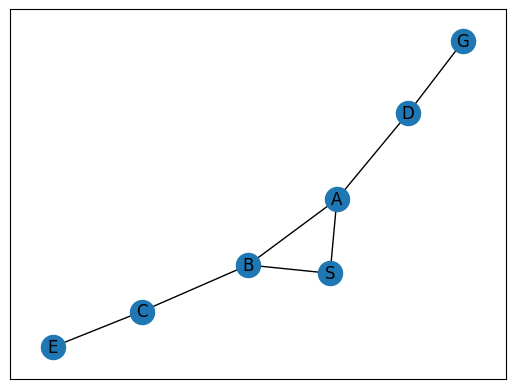

All paths from S to G:
S->A->D->G
S->B->A->D->G


In [ ]:
#British Mueseum Search

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
L = ['S', 'A', 'B', 'C', 'D', 'E', 'G']
G.add_nodes_from(L)
G.add_edges_from([('S', 'A'), ('S', 'B'), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'E'), ('D', 'G')])
nx.draw_networkx(G, with_labels=True)
plt.show()

def british_museum_search(graph, start, dest):
    visited = set()
    q = [[start]]
    all_paths = []
    while q:
        current_path = q.pop(0)
        current_node = current_path[-1]
        if current_node == dest:
            all_paths.append(current_path)
        else:
            for neighbor in graph.neighbors(current_node):
                if neighbor not in current_path:
                    new_path = current_path.copy()
                    new_path.append(neighbor)
                    q.append(new_path)
    return all_paths

all_paths = british_museum_search(G, 'S', 'G')
print("All paths from S to G:")
for path in all_paths:
    print("->".join(path))

DEPTH FIRST SEARCH(DFS)

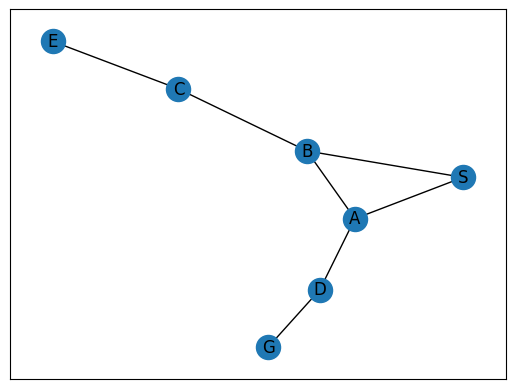

DFS path: S->A->D->G


In [ ]:
#Depth First Search

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
L=['S','A','B','C','D','E','G']
G.add_nodes_from(L)
G.add_edges_from([('S', 'A'),('S','B'),('A','B'),('A','D'),('B','C'),('C','E'),('D','G')])
nx.draw_networkx(G,with_labels=True)
plt.show()

def dfs(graph, node, dest, visited=None):
    if visited is None:
        visited = set()
    visited.add(node)
    if node == dest:
        return [node]
    for neighbor in graph.neighbors(node):
        if neighbor not in visited:
            path = dfs(graph, neighbor, dest, visited)
            if path is not None:
                return [node] + path
    return None
dfs_path = dfs(G, 'S', 'G')
print("DFS path:", "->".join(dfs_path))

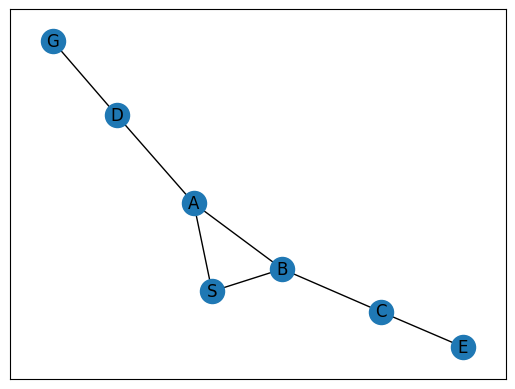

DFS tree nodes: ['S', 'A', 'B', 'C', 'E', 'D', 'G']
DFS path: S->A->D->G


In [ ]:
#dfs using built in function
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
L=['S','A','B','C','D','E','G']
G.add_nodes_from(L)
G.add_edges_from([('S', 'A'),('S','B'),('A','B'),('A','D'),('B','C'),('C','E'),('D','G')])

nx.draw_networkx(G, with_labels=True)
plt.show()

dfs_tree = nx.dfs_tree(G, source='S')
print("DFS tree nodes:", list(dfs_tree.nodes()))
dfs_path = list(nx.shortest_path(dfs_tree, source='S', target='G'))
print("DFS path:","->".join(dfs_path))

BREADTH FIRST SEARCH(BFS)

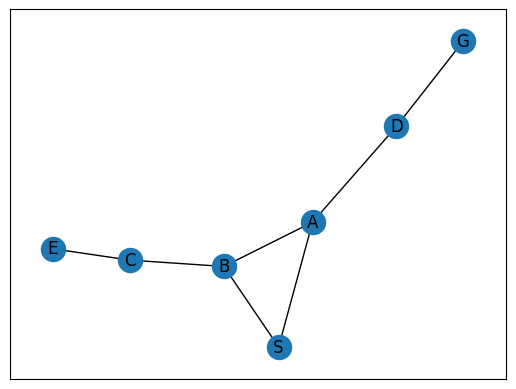

BFS path: S->A->D->G


In [ ]:
#Breadth First Search

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
L=['S','A','B','C','D','E','G']
G.add_nodes_from(L)
G.add_edges_from([('S', 'A'),('S','B'),('A','B'),('A','D'),('B','C'),('C','E'),('D','G')])

nx.draw_networkx(G, with_labels=True)
plt.show()

def bfs(graph, start, dest):
    q = [(start, [start])]
    visited = set()
    while q:
        node, path = q.pop(0)
        visited.add(node)
        if node == dest:
            return path
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                q.append((neighbor, path + [neighbor]))
                visited.add(neighbor)
    return None

bfs_path = bfs(G, 'S', 'G')
print("BFS path:", "->".join(bfs_path))

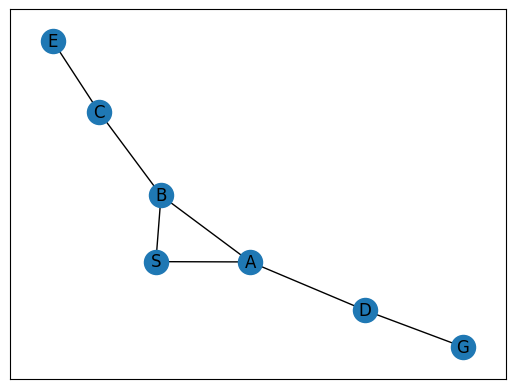

BFS tree nodes: ['S', 'A', 'B', 'D', 'C', 'G', 'E']
BFS path: S->A->D->G


In [ ]:
#bfs using built in function
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
L=['S','A','B','C','D','E','G']
G.add_nodes_from(L)
G.add_edges_from([('S', 'A'),('S','B'),('A','B'),('A','D'),('B','C'),('C','E'),('D','G')])

nx.draw_networkx(G, with_labels=True)
plt.show()

bfs_tree = nx.bfs_tree(G, source='S')
print("BFS tree nodes:", list(bfs_tree.nodes()))
bfs_path = list(nx.shortest_path(bfs_tree, source='S', target='G'))
print("BFS path:","->".join(bfs_path))

HILL CLIMBING

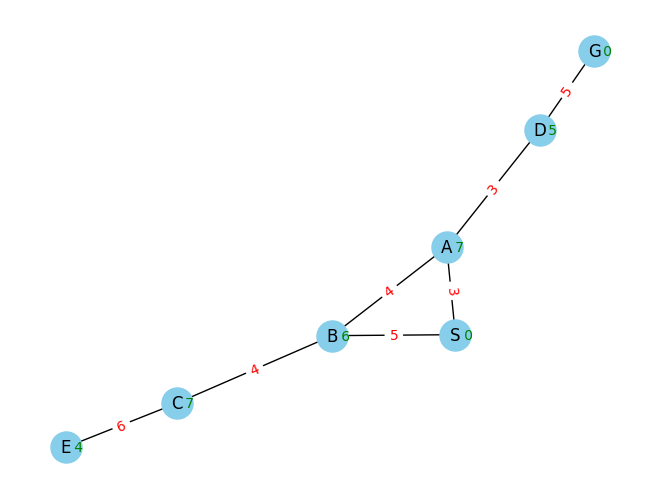

Hill Climbing path: S->B->A->D->G


In [ ]:
#Hill Climbing

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
L = ['S', 'A', 'B', 'C', 'D', 'E', 'G']
G.add_nodes_from(L)
weights = [('S', 'A', 3), ('S', 'B', 5), ('A', 'B', 4), ('A', 'D', 3), ('B', 'C', 4), ('C', 'E', 6), ('D', 'G', 5)]
for edge in weights:
    G.add_edge(edge[0], edge[1], weight=edge[2])
pos = nx.spring_layout(G)
heuristics = {'S': 0, 'A': 7, 'B': 6, 'C': 7, 'D': 5, 'E': 4, 'G': 0}
def heuristic(node):
    return heuristics[node]
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
heuristic_labels = {node: f'      {heuristics[node]}' for node in G.nodes()}
nx.draw_networkx_labels(G, pos=pos, labels=heuristic_labels, font_size=10, font_color='green')
plt.show()

def hill_climbing(graph, start, dest, hf):
    visited = set()
    s = [(start, [start])]
    while s:
        node, path = s.pop()
        visited.add(node)
        if node == dest:
            return path
        neighbors = list(graph.neighbors(node))
        neighbors.sort(key=lambda neighbor: hf(neighbor), reverse=True)
        for neighbor in neighbors:
            if neighbor not in visited:
                new_path = path + [neighbor]
                s.append((neighbor, new_path))
    return None

hill_climbing_path = hill_climbing(G, 'S', 'G', heuristic)
if hill_climbing_path:
    print("Hill Climbing path:", "->".join(hill_climbing_path))
else:
    print("No path found using Hill Climbing")

BEAM SEARCH

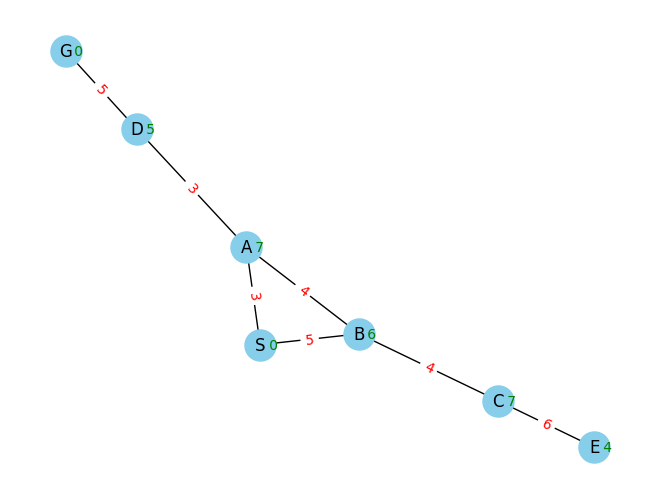

Beam Search path (width = 2 ): S->A->D->G
Total cost: 11


In [ ]:
#Beam Search

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
L = ['S', 'A', 'B', 'C', 'D', 'E', 'G']
G.add_nodes_from(L)
weights = [('S', 'A', 3), ('S', 'B', 5), ('A', 'B', 4), ('A', 'D', 3), ('B', 'C', 4), ('C', 'E', 6), ('D', 'G', 5)]
for edge in weights:
    G.add_edge(edge[0], edge[1], weight=edge[2])
pos = nx.spring_layout(G)
heuristics = {'S': 0, 'A': 7, 'B': 6, 'C': 7, 'D': 5, 'E': 4, 'G': 0}
def heuristic(node):
    return heuristics[node]
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
heuristic_labels = {node: f'      {heuristics[node]}' for node in G.nodes()}
nx.draw_networkx_labels(G, pos=pos, labels=heuristic_labels, font_size=10, font_color='green')
plt.show()

start_node = 'S'
goal_node = 'G'

def beam_search(graph, start, goal, beam_width):
    q = [(start, [start], 0)]
    while q:
        node, path, total_cost = q.pop(0)
        if node == goal:
            return path, total_cost
        neighbors = list(graph.neighbors(node))
        neighbors.sort(key=lambda neighbor: heuristic(neighbor), reverse=True)
        for neighbor in neighbors[:beam_width]:
            edge_cost = graph[node][neighbor]['weight']
            new_cost = total_cost + edge_cost
            new_path = path + [neighbor]
            q.append((neighbor, new_path, new_cost))
    return None, None
beam_width = 2
beam_search_path, beam_search_cost = beam_search(G, start_node, goal_node, beam_width)

if beam_search_path:
    print("Beam Search path (width =", beam_width, "):", "->".join(beam_search_path))
    print("Total cost:", beam_search_cost)
else:
    print("No path found using Beam Search")

ORACLE

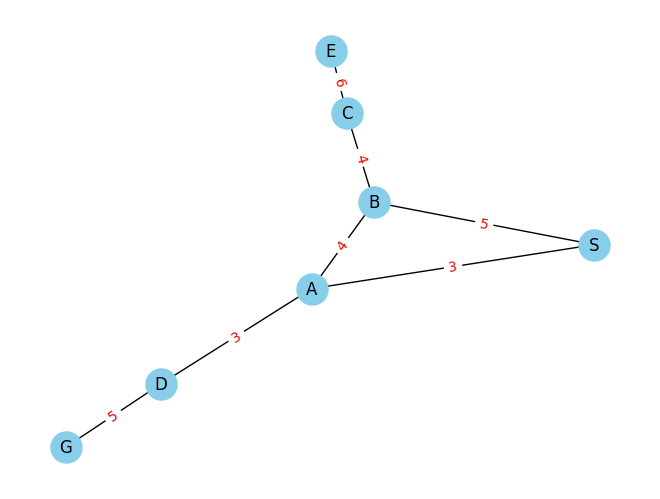

All paths from S to G with costs:
Path 1: S->A->D->G | Weight: 11
Path 2: S->B->A->D->G | Weight: 17

The Oracle (Least Cost Path): S->A->D->G | Weight: 11


In [ ]:
#ORACLE

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
L=['S','A','B','C','D','E','G']
G.add_nodes_from(L)
weights = [('S', 'A',3),('S','B',5),('A','B',4),('A','D',3),('B','C',4),('C','E',6),('D','G',5)]
G.add_weighted_edges_from(weights)

pos = nx.spring_layout(G)  # Automatically compute node positions
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
plt.show()

def oracle(graph, start, dest):
    visited = set()
    q = [(start, [start], 0)]
    all_paths = []
    while q:
        current_node, current_path, current_cost = q.pop(0)
        if current_node == dest:
            all_paths.append((current_path, current_cost))
        else:
            for neighbor in graph.neighbors(current_node):
                if neighbor not in current_path:
                    edge_cost = graph[current_node][neighbor]['weight']
                    new_cost = current_cost + edge_cost
                    new_path = current_path + [neighbor]
                    q.append((neighbor, new_path, new_cost))
    return all_paths

all_paths = oracle(G, 'S', 'G')
print("All paths from S to G with costs:")
for i, (path, weight) in enumerate(all_paths):
    print(f"Path {i + 1}: {'->'.join(path)} | Weight: {weight}")
oracle_path, oracle_weight = all_paths[0]
print(f"\nThe Oracle (Least Cost Path): {'->'.join(oracle_path)} | Weight: {oracle_weight}")

BRANCH AND BOUND

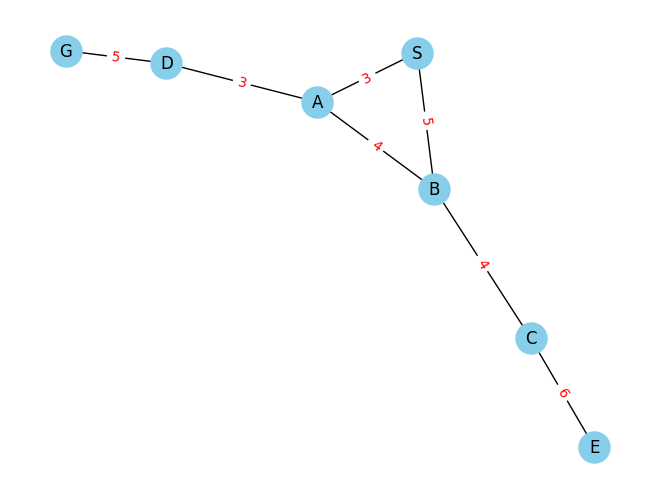

Branch and Bound Path: ['S', 'A', 'D', 'G'] | Weight: 11


In [ ]:
#Branch & Bound

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
L = ['S', 'A', 'B', 'C', 'D', 'E', 'G']
G.add_nodes_from(L)
weights = [('S', 'A', 3), ('S', 'B', 5), ('A', 'B', 4), ('A', 'D', 3), ('B', 'C', 4), ('C', 'E', 6), ('D', 'G', 5)]
G.add_weighted_edges_from(weights)

pos = nx.spring_layout(G)  # Automatically compute node positions
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
plt.show()

def branch_and_bound(graph, start, dest, oracle_cost, oracle_path):
    pq = [(0, [start])]
    best_path = None
    best_cost = float('inf')
    while pq:
        bound, path = pq.pop(0)
        current_node = path[-1]
        if current_node == dest:
            if bound < best_cost:
                best_path = path
                best_cost = bound
        else:
            for neighbor in graph.neighbors(current_node):
                if neighbor not in path:
                    edge_cost = graph[current_node][neighbor]['weight']
                    new_path = path + [neighbor]
                    new_bound = bound + edge_cost
                    if new_bound + oracle_cost < best_cost:
                        pq.append((new_bound, new_path))
    return best_path, best_cost

provided_oracle_cost = 11
provided_oracle_path = ['S', 'A', 'D', 'G']

bb_path, bb_weight = branch_and_bound(G, 'S', 'G', provided_oracle_cost, provided_oracle_path)
print("Branch and Bound Path:", bb_path, "| Weight:", bb_weight)

BRANCH AND BOUND + EXT LIST

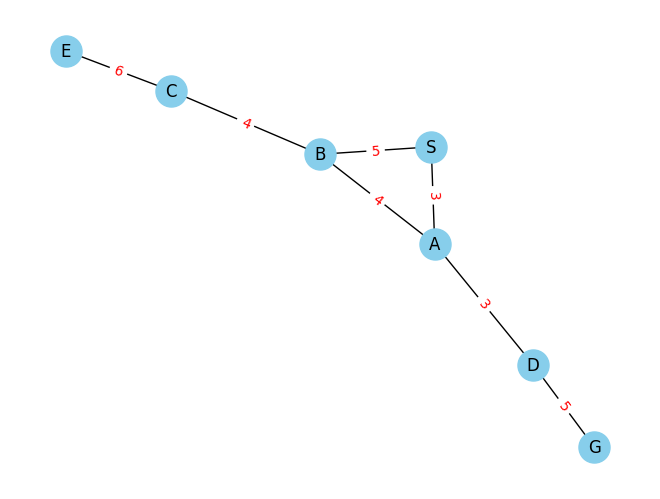

Branch and Bound with Extended list Path: ['S', 'A', 'D', 'G'] | Weight: 11


In [ ]:
#Branch & Bound + Extended List

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
L = ['S', 'A', 'B', 'C', 'D', 'E', 'G']
G.add_nodes_from(L)
weights = [('S', 'A', 3), ('S', 'B', 5), ('A', 'B', 4), ('A', 'D', 3), ('B', 'C', 4), ('C', 'E', 6), ('D', 'G', 5)]
G.add_weighted_edges_from(weights)

pos = nx.spring_layout(G)  # Automatically compute node positions
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
plt.show()

def dead_horse(graph, start, dest, oracle_cost, oracle_path):
    pq = [(0, [start])]
    best_path = None
    best_cost = float('inf')
    visited_nodes = set()
    while pq:
        bound, path = pq.pop(0)
        current_node = path[-1]
        if current_node in visited_nodes:
            continue
        visited_nodes.add(current_node)
        if current_node == dest:
            if bound < best_cost:
                best_path = path
                best_cost = bound
        else:
            for neighbor in graph.neighbors(current_node):
                if neighbor not in path:
                    edge_cost = graph[current_node][neighbor]['weight']
                    new_path = path + [neighbor]
                    new_bound = bound + edge_cost
                    if new_bound + oracle_cost < best_cost:
                        pq.append((new_bound, new_path))

    return best_path, best_cost

provided_oracle_cost = 11
provided_oracle_path = ['S', 'A', 'D', 'G']

bb_path, bb_weight = dead_horse(G, 'S', 'G', provided_oracle_cost, provided_oracle_path)
print("Branch and Bound with Extended list Path:", bb_path, "| Weight:", bb_weight)


A* ALGORITHM

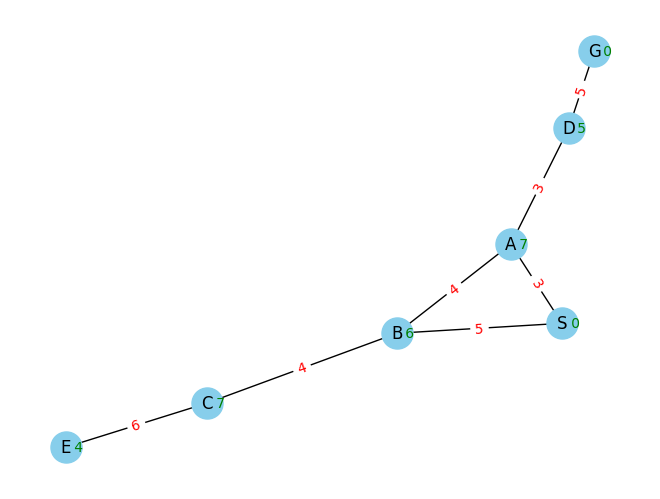

A* Path:
Path: S->A->D->G | Weight: 11


In [ ]:
#A* Algorithm

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
L = ['S', 'A', 'B', 'C', 'D', 'E', 'G']
G.add_nodes_from(L)
weights = [('S', 'A', 3), ('S', 'B', 5), ('A', 'B', 4), ('A', 'D', 3), ('B', 'C', 4), ('C', 'E', 6), ('D', 'G', 5)]
G.add_weighted_edges_from(weights)

pos = nx.spring_layout(G)  # Automatically compute node positions
heuristics = {'S': 0, 'A': 7, 'B': 6, 'C': 7, 'D': 5, 'E': 4, 'G': 0}
def heuristic(node):
    return heuristics[node]

nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
heuristic_labels = {node: f'      {heuristics[node]}' for node in G.nodes()}
nx.draw_networkx_labels(G, pos=pos, labels=heuristic_labels, font_size=10, font_color='green')
plt.show()

def a_star(graph, start, dest, heuristic_func):
    visited = set()
    open_list = [(start, [start], 0, heuristic_func(start))]
    while open_list:
        open_list.sort(key=lambda x: x[2] + x[3])
        current_node, current_path, current_cost, current_heuristic = open_list.pop(0)
        if current_node == dest:
            return current_path, current_cost
        if current_node not in visited:
            visited.add(current_node)
            for neighbor in graph.neighbors(current_node):
                if neighbor not in current_path:
                    edge_cost = graph[current_node][neighbor]['weight']
                    new_cost = current_cost + edge_cost
                    heuristic_value = heuristic_func(neighbor)
                    new_path = current_path + [neighbor]
                    open_list.append((neighbor, new_path, new_cost, heuristic_value))
    return None

oracle_path, oracle_weight = a_star(G, 'S', 'G', heuristic)
print("A* Path:")
print(f"Path: {'->'.join(oracle_path)} | Weight: {oracle_weight}")

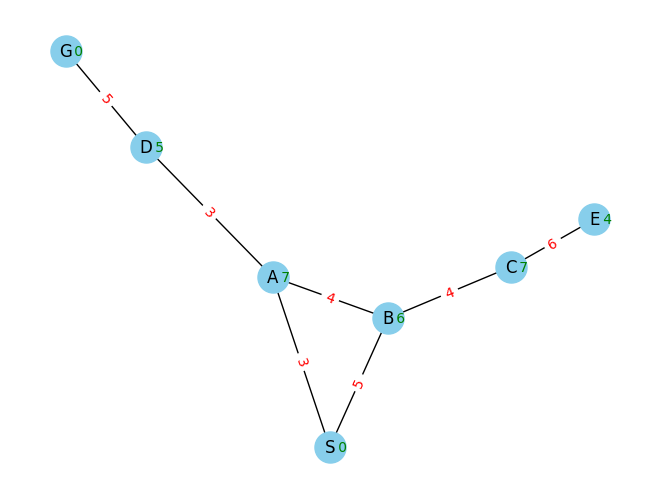

A* Path: ['S', 'A', 'D', 'G'] | Weight: 11


In [ ]:
#A* using built in function
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
L = ['S', 'A', 'B', 'C', 'D', 'E', 'G']
G.add_nodes_from(L)
weights = [('S', 'A', 3), ('S', 'B', 5), ('A', 'B', 4), ('A', 'D', 3), ('B', 'C', 4), ('C', 'E', 6), ('D', 'G', 5)]
G.add_weighted_edges_from(weights)

pos = nx.spring_layout(G)  # Automatically compute node positions
heuristics = {'S': 0, 'A': 7, 'B': 6, 'C': 7, 'D': 5, 'E': 4, 'G': 0}
def heuristic(node):
    return heuristics[node]

nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
heuristic_labels = {node: f'      {heuristics[node]}' for node in G.nodes()}
nx.draw_networkx_labels(G, pos=pos, labels=heuristic_labels, font_size=10, font_color='green')
plt.show()

provided_oracle_cost = 11
provided_oracle_path = ['S', 'A', 'D', 'G']

def custom_weight(u, v, d):
    edge_cost = d['weight']
    return edge_cost + heuristic(v)

astar_path = nx.astar_path(G, source='S', target='G', weight=custom_weight)
astar_weight = sum(G[u][v]['weight'] for u, v in zip(astar_path, astar_path[1:]))
print("A* Path:", astar_path, "| Weight:", astar_weight)